# Digit Recognition

## Importing data

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


digits = datasets.load_digits()

## Preparing data

In [20]:
images = digits.images
labels = digits.target

n_samples = len(images)
images = images.reshape((n_samples, -1))

classes = ['0','1','2','3','4','5','6','7','8','9']


n_train = int(n_samples*0.8) #We train the model with 80% of samples in the DataSet 
n_test = n_samples - n_train #and we validate the model with the 20% of he samples

## Splitting Data into Train and Test


In [21]:
X_train = images[:n_train]
X_test = images[n_train:]

Y_train = labels[:n_train]
Y_test = labels[n_train:]

## Creating and training the model
#### Decision Tree model

In [22]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

## Printing the model

[Text(215.27189440993786, 579.2737500000001, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [143, 146, 142, 146, 144, 145, 144, 143, 141, 143]\nclass = 1'),
 Text(48.52173913043478, 541.90125, 'X[42] <= 3.5\ngini = 0.54\nsamples = 217\nvalue = [140, 0, 2, 1, 6, 22, 5, 0, 2, 39]\nclass = 0'),
 Text(22.181366459627327, 504.52875000000006, 'X[21] <= 6.5\ngini = 0.447\nsamples = 56\nvalue = [0, 0, 0, 1, 0, 17, 0, 0, 0, 38]\nclass = 9'),
 Text(11.090683229813664, 467.15625, 'X[18] <= 8.5\ngini = 0.111\nsamples = 17\nvalue = [0, 0, 0, 0, 0, 16, 0, 0, 0, 1]\nclass = 5'),
 Text(5.545341614906832, 429.78375000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]\nclass = 9'),
 Text(16.636024844720495, 429.78375000000005, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 0, 0, 16, 0, 0, 0, 0]\nclass = 5'),
 Text(33.27204968944099, 467.15625, 'X[52] <= 11.5\ngini = 0.099\nsamples = 39\nvalue = [0, 0, 0, 1, 0, 1, 0, 0, 0, 37]\nclass = 9'),
 Text(27.72670807453416, 429.78375000000

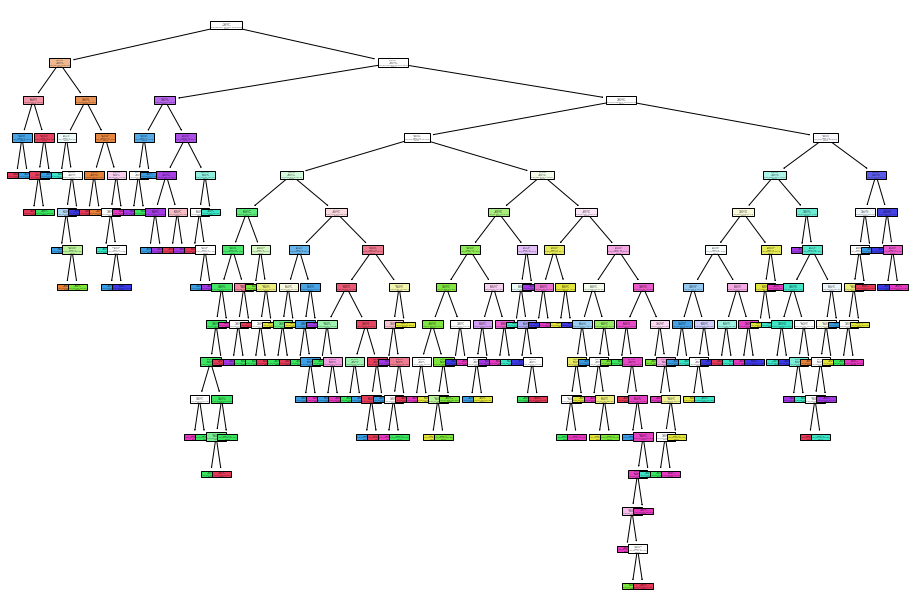

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(16,11))
plot_tree(DecisionTree_model,class_names = classes,filled= True)

In [24]:
print(export_text(DecisionTree_model,show_weights=True))

|--- feature_36 <= 0.50
|   |--- feature_42 <= 3.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_18 <= 8.50
|   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00] class: 9
|   |   |   |--- feature_18 >  8.50
|   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 16.00, 0.00, 0.00, 0.00, 0.00] class: 5
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_52 <= 11.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 37.00] class: 9
|   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: 3
|   |   |   |--- feature_52 >  11.50
|   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00] class: 5
|   |--- feature_42 >  3.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_3 <= 4.50
|   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 

In [25]:
Y_predicted=DecisionTree_model.predict(X_test)

print("The accuracy of the Decision tree algorithm is")
DecisionTree_model.score(X_test,Y_test)


The accuracy of the Decision tree algorithm is


0.7833333333333333

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(Y_test, Y_predicted ))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.76      0.61      0.68        36
           2       0.90      0.77      0.83        35
           3       0.74      0.70      0.72        37
           4       0.78      0.78      0.78        37
           5       0.74      0.76      0.75        37
           6       0.84      0.97      0.90        37
           7       0.78      0.86      0.82        36
           8       0.69      0.76      0.72        33
           9       0.66      0.68      0.67        37

    accuracy                           0.78       360
   macro avg       0.79      0.78      0.78       360
weighted avg       0.79      0.78      0.78       360



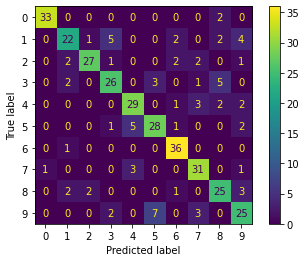

In [27]:
confusion_matrix = confusion_matrix(Y_test, Y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

disp.plot()
